Chapter 11

# QR分解
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码首先生成了一个随机矩阵 $X$（大小为 $9 \times 5$），然后对该矩阵进行 QR 分解，包括**完整 QR 分解**和**简化 QR 分解**两种形式，并可视化分解结果。

1. **QR 分解**：QR 分解将矩阵 $X$ 表示为正交矩阵 $Q$ 与上三角矩阵 $R$ 的乘积：
   
   $$
   X = Q \cdot R
   $$

   - 在**完整版本**中，QR 分解生成的 $Q_{\text{complete}}$ 为 $9 \times 9$ 的正交矩阵，$R_{\text{complete}}$ 为 $9 \times 5$ 的上三角矩阵。
   - 在**简化版本**中，QR 分解生成的 $Q$ 为 $9 \times 5$ 的矩阵，$R$ 为 $5 \times 5$ 的上三角矩阵。默认情况下，`np.linalg.qr` 使用这种简化模式。

2. **验证 $Q$ 的性质**：对于正交矩阵 $Q$，其转置矩阵与自身相乘应为单位矩阵：

   $$
   Q^T Q = I
   $$

   在代码中，通过计算 $Q^T Q$ 验证 $Q$ 的正交性，展示了 $Q$、$Q^T$ 以及 $Q^T Q$ 的结果。

3. **可视化**：使用 `seaborn` 的热图展示分解后的矩阵 $X$、$Q$、$R$ 及验证矩阵 $Q^T Q$。这些图形使得每个矩阵及其特性在颜色分布上更直观呈现，以帮助理解 QR 分解过程中矩阵的正交性和上三角结构。

In [1]:
import numpy as np  # 导入数值计算库
import seaborn as sns  # 导入数据可视化库
from matplotlib import pyplot as plt  # 导入绘图库

## 生成原始数据矩阵 X

In [2]:
np.random.default_rng()
X = np.random.randn(9, 5)

## 完整版 QR 分解

Text(0.5, 1.0, 'Rc')

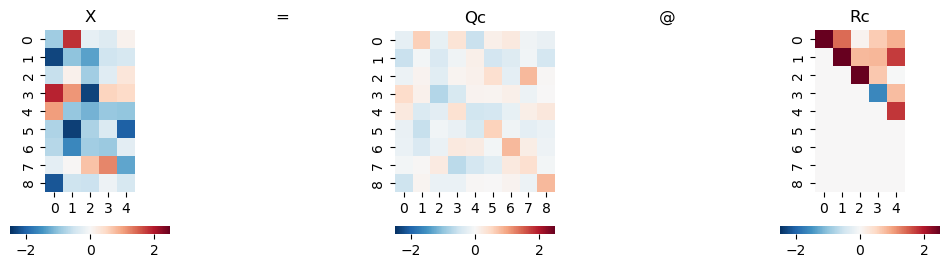

In [3]:
Q_complete, R_complete = np.linalg.qr(X, mode='complete')

fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制矩阵 X 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('X')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q_complete, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制完整正交矩阵 Qc 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(R_complete, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制上三角矩阵 Rc 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Rc')

## Q 的性质（完整版）

Text(0.5, 1.0, 'Qc')

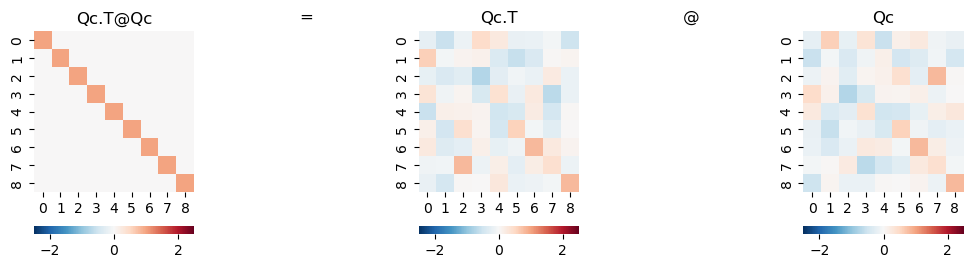

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(Q_complete.T @ Q_complete, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T @ Qc 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc.T@Qc')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q_complete.T, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc.T')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Q_complete, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制 Qc 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc')

## 简化版 QR 分解

Text(0.5, 1.0, 'R')

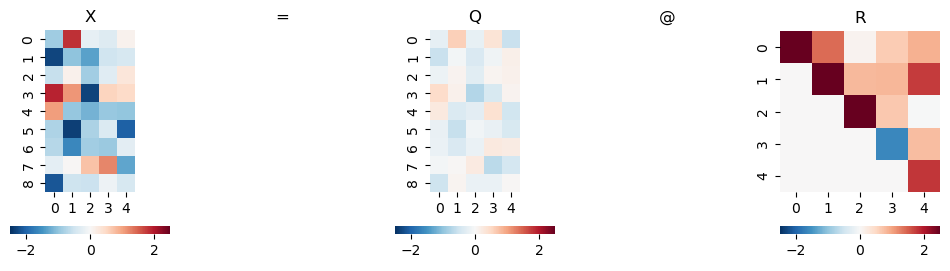

In [5]:
Q, R = np.linalg.qr(X)

fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制矩阵 X 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('X')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制简化正交矩阵 Q 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(R, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制上三角矩阵 R 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('R')

## Q 的性质（简化版）

Text(0.5, 1.0, 'Q')

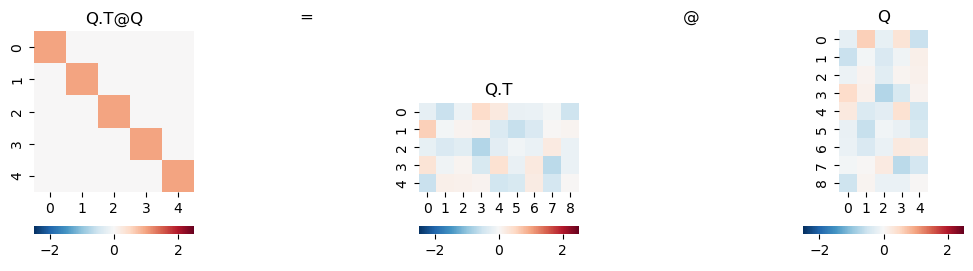

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(Q.T @ Q, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制 Q.T @ Q 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q.T@Q')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q.T, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制 Q.T 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q.T')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Q, cmap='RdBu_r', vmax=2.5, vmin=-2.5,  # 绘制 Q 的热图
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q')